In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn import preprocessing

In [3]:
%run ../paths.py

In [4]:
train = pd.read_csv(CONST.CLEANED_TRAIN)
test = pd.read_csv(CONST.CLEANED_TEST)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42478 entries, 0 to 42477
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42478 non-null  int64  
 1   Unnamed: 0.1           42478 non-null  int64  
 2   tweet                  42478 non-null  object 
 3   class                  42478 non-null  int64  
 4   neg                    42478 non-null  float64
 5   pos                    42478 non-null  float64
 6   neu                    42478 non-null  float64
 7   compound               42478 non-null  float64
 8   num_exclamation_marks  42478 non-null  int64  
 9   num_question_marks     42478 non-null  int64  
 10  num_symbols            42478 non-null  int64  
 11  stopword_count         42478 non-null  int64  
 12  emoji_count            42478 non-null  int64  
 13  total_length           42478 non-null  int64  
 14  num_words              42478 non-null  int64  
 15  nu

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11948 entries, 0 to 11947
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11948 non-null  int64  
 1   tweet                  11948 non-null  object 
 2   class                  11948 non-null  float64
 3   neg                    11948 non-null  float64
 4   pos                    11948 non-null  float64
 5   neu                    11948 non-null  float64
 6   compound               11948 non-null  float64
 7   num_exclamation_marks  11948 non-null  float64
 8   num_question_marks     11948 non-null  float64
 9   num_symbols            11948 non-null  float64
 10  stopword_count         11948 non-null  float64
 11  emoji_count            11948 non-null  float64
 12  total_length           11948 non-null  float64
 13  num_words              11948 non-null  float64
 14  num_unique_words       11948 non-null  float64
 15  wo

## Plotting function

In [12]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance datafra me (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)


## using only meta features 

* f_classif: ANOVA F-value between label/feature for classification tasks.
* mutual_info_classif: Mutual information for a discrete target.
* chi2: Chi-squared stats of non-negative features for classification tasks

In [13]:
y = train["class"]
x = train[train.columns[4:]]

In [14]:
x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)
x.columns = train.columns[4:]

In [15]:
#extracting top 10
#f_classif
best_features = SelectKBest(k=10)
fit = best_features.fit(x,y)

In [16]:
#??SelectKBest

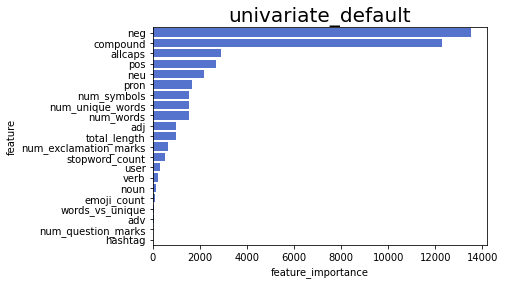

In [17]:
var_imp_plot(imp_df(x.columns ,fit.scores_),"univariate_default")

## Tree Based models

In [18]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rf_model = RandomForestClassifier().fit(x,y)
et_model = ExtraTreesClassifier().fit(x,y)

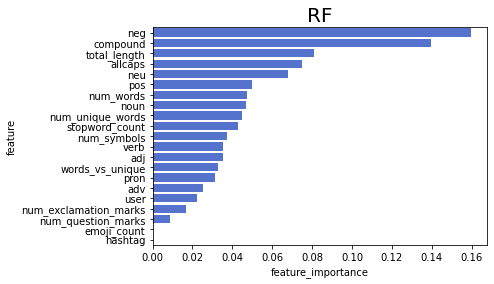

In [19]:
var_imp_plot(imp_df(x.columns ,rf_model.feature_importances_),"RF")

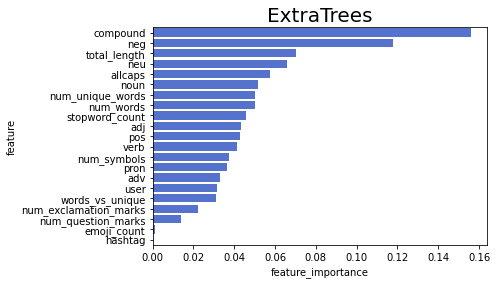

In [20]:
var_imp_plot(imp_df(x.columns ,et_model.feature_importances_),"ExtraTrees")

## heatmap


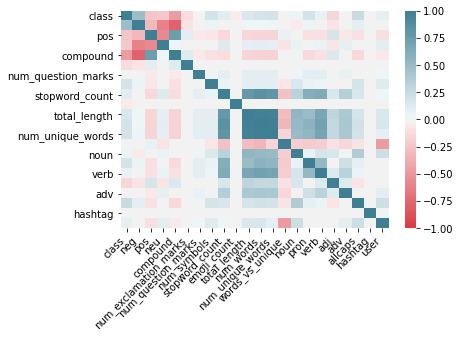

In [21]:
corr = train[train.columns[3:]].corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(10,220,n=500))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

In [117]:
type(corr["class"])

pandas.core.series.Series

In [25]:
imp_df(x.columns ,fit.scores_)[:10]


,feature,feature_importance
0,neg,13538.651072
1,compound,12302.225762
2,allcaps,2913.316864
3,pos,2675.783800
4,neu,2178.203230
5,pron,1683.177031
6,num_symbols,1564.372758
7,num_unique_words,1563.144916
8,num_words,1534.542845
9,adj,1012.445373


In [27]:
imp_df(x.columns ,rf_model.feature_importances_)[:10]

,feature,feature_importance
0,neg,0.159818
1,compound,0.139799
2,total_length,0.080974
3,allcaps,0.075121
4,neu,0.068077
5,pos,0.049643
6,num_words,0.047348
7,noun,0.046689
8,num_unique_words,0.045039
9,stopword_count,0.042658


In [29]:
imp_df(x.columns ,et_model.feature_importances_)[:10]

,feature,feature_importance
0,compound,0.156244
1,neg,0.117719
2,total_length,0.070456
3,neu,0.065972
4,allcaps,0.057419
5,noun,0.051684
6,num_unique_words,0.050191
7,num_words,0.050020
8,stopword_count,0.045865
9,adj,0.043300


In [ ]:
#neg,compound,allcaps,total_length,num_unique_words,adj